<a href="https://colab.research.google.com/github/diogovaroni/DataScience-regressao-linear/blob/main/Entrega_Aula_08_Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade para entregar - Regressão Linear Simples
## Aluno: Diogo Varoni de Moura

- Entrega até 02/11/2022 - 23:59
- Individual - Valor: 0,5
- Entrega com o arquivo no formato ipynb
- Dataset a ser utilizado: ENEM 2019_tratado. 
- Podem usar os arquivos já disponibilizados como base
- Células com comentários a respeito do que os gráficos e correlações apresentam são obrigatórias.

Exercícios:

- Faça um filtro por cidades como Campinas, São Paulo, etc para encontrar notas com distribuições normais para comparação.
- A nota de redação é uma forte candidata a distribuição normal conforme os exercícios das últimas aulas.
- Para ter uma maior variabilidade teste o conjunto em cidades com mais de 40 entradas.
- Teste a normalidade da coluna de NOTA_REDACAO (qqplot e teste de hipotese)
- Nao e necessário o comentário em cada célula.
- Utilize os conceitos de correlação para identificar possíveis variáveis para aplicar regressão linear simples.


In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_enem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')
df_enem

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
0,"1,90E+11",Santa Isabel,22,M,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,600.2,ingles,sem_problemas,160.0,200.0,180.0,200.0,200.0,940.0,B
1,"1,90E+11",SÃ£o Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,privada,nao,...,731.8,ingles,sem_problemas,160.0,120.0,200.0,200.0,200.0,880.0,A
2,"1,90E+11",SÃ£o Bernardo do Campo,19,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,393.2,espanhol,sem_problemas,80.0,160.0,120.0,100.0,100.0,560.0,B
3,"1,90E+11",Embu-GuaÃ§u,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,419.2,ingles,sem_problemas,120.0,120.0,120.0,120.0,80.0,560.0,B
4,"1,90E+11",Guarulhos,23,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,796.1,ingles,sem_problemas,160.0,200.0,180.0,180.0,160.0,880.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581166,"1,90E+11",SÃ£o Paulo,18,F,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,479.1,espanhol,sem_problemas,100.0,120.0,120.0,140.0,100.0,580.0,B
581167,"1,90E+11",SÃ£o Paulo,17,F,solteiro(a),preta,brasileiro(a),conclui_2019,publica,nao,...,43.2,espanhol,sem_problemas,80.0,120.0,140.0,120.0,100.0,560.0,B
581168,"1,90E+11",SÃ£o Paulo,17,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,487.3,ingles,sem_problemas,120.0,80.0,60.0,120.0,0.0,380.0,B
581169,"1,90E+11",SÃ£o Paulo,17,M,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,401.1,ingles,sem_problemas,160.0,120.0,160.0,140.0,160.0,740.0,A


In [4]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581171 entries, 0 to 581170
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   INSCRICAO             581171 non-null  object 
 1   MUNICIPIO_RESIDENCIA  581171 non-null  object 
 2   IDADE                 581171 non-null  int64  
 3   SEXO                  581171 non-null  object 
 4   ESTADO_CIVIL          581171 non-null  object 
 5   COR_RACA              581171 non-null  object 
 6   NACIONALIDADE         581171 non-null  object 
 7   CONCLUSAO             581171 non-null  object 
 8   ESCOLA                581171 non-null  object 
 9   TREINEIRO             581171 non-null  object 
 10  COD_ESCOLA            176894 non-null  float64
 11  PRESENCA_CN           581171 non-null  object 
 12  PRESENCA_CH           581171 non-null  object 
 13  PRESENCA_LC           581171 non-null  object 
 14  PRESENCA_MT           581171 non-null  object 
 15  

In [5]:
df_suzano=df_enem[df_enem['MUNICIPIO_RESIDENCIA']=="Suzano"]
df_suzano

,INSCRICAO,MUNICIPIO_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,CONCLUSAO,ESCOLA,TREINEIRO,...,NOTA_MT,LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,Q025
203,"1,90E+11",Suzano,17,F,solteiro(a),branca,brasileiro(a),conclui_2019,publica,nao,...,366.9,espanhol,sem_problemas,120.0,100.0,120.0,120.0,0.0,460.0,B
371,"1,90E+11",Suzano,17,M,solteiro(a),parda,brasileiro(a) naturalizado(a),conclui_2019,privada,nao,...,534.3,ingles,sem_problemas,140.0,120.0,140.0,120.0,120.0,640.0,B
399,"1,90E+11",Suzano,18,F,solteiro(a),branca,brasileiro(a),conclui_2019,publica,nao,...,515.4,espanhol,sem_problemas,160.0,180.0,160.0,120.0,180.0,800.0,B
433,"1,90E+11",Suzano,19,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,508.5,espanhol,sem_problemas,80.0,120.0,100.0,80.0,60.0,440.0,A
455,"1,90E+11",Suzano,20,F,solteiro(a),parda,brasileiro(a),ja_concluiu,nao_declarado,nao,...,525.9,espanhol,sem_problemas,120.0,120.0,120.0,120.0,120.0,600.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,"1,90E+11",Suzano,17,F,solteiro(a),branca,brasileiro(a),conclui_2019,publica,nao,...,483.9,espanhol,sem_problemas,120.0,80.0,80.0,120.0,40.0,440.0,B
580880,"1,90E+11",Suzano,18,M,solteiro(a),branca,brasileiro(a),conclui_2019,publica,nao,...,546.6,ingles,sem_problemas,140.0,160.0,140.0,140.0,140.0,720.0,B
580897,"1,90E+11",Suzano,18,F,solteiro(a),parda,brasileiro(a),conclui_2019,publica,nao,...,428.1,ingles,sem_problemas,80.0,100.0,120.0,80.0,140.0,520.0,B
580945,"1,90E+11",Suzano,19,F,solteiro(a),branca,brasileiro(a),ja_concluiu,nao_declarado,nao,...,508.7,espanhol,sem_problemas,120.0,120.0,120.0,120.0,120.0,600.0,B


In [6]:
import plotly.express as px
grafico = px.box(df_suzano, y="NOTA_REDACAO")
grafico.show()

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [8]:
# Teste Shapiro-Wilk
stats.shapiro(df_suzano.NOTA_REDACAO)

ShapiroResult(statistic=0.9507933259010315, pvalue=9.056460768553481e-36)

In [9]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [10]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(df_suzano.NOTA_REDACAO, dist = 'norm')

(0.09872619422901946, 0.0009999999999998899)

In [11]:
import seaborn as sns


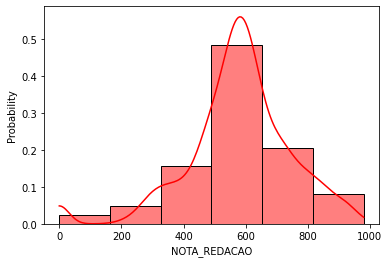

In [12]:

sns.histplot(df_suzano, x='NOTA_REDACAO', bins=6, color="red", kde=True, stat="probability");

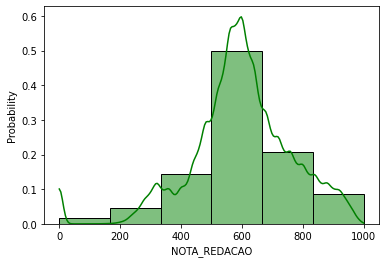

In [13]:

sns.histplot(df_enem, x='NOTA_REDACAO', bins=6, color="green", kde=True, stat="probability");

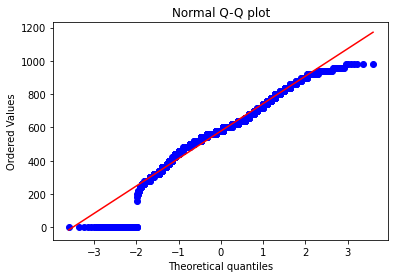

In [14]:

stats.probplot(df_suzano['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

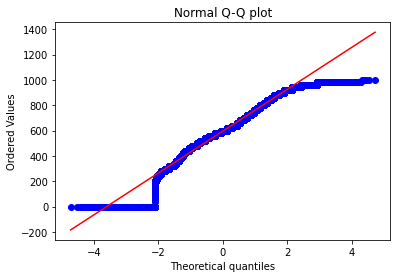

In [15]:

stats.probplot(df_enem['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [16]:
# Lista com nota final
nota_final = ['NOTA_CN','NOTA_CH','NOTA_MT','NOTA_LC', 'NOTA_REDACAO']

In [17]:
df_suzano['nota_final'] = (df_suzano[nota_final].mean(axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
df_suzano = df_suzano[['NOTA_CN','NOTA_MT','NOTA_LC','NOTA_CH','NOTA_REDACAO','nota_final']]

In [19]:
correlacoes = df_suzano.corr(method='pearson')
correlacoes

,NOTA_CN,NOTA_MT,NOTA_LC,NOTA_CH,NOTA_REDACAO,nota_final
NOTA_CN,1.000000,0.160758,0.076206,0.096587,0.204839,0.524715
NOTA_MT,0.160758,1.000000,0.089867,0.113090,0.253616,0.603771
NOTA_LC,0.076206,0.089867,1.000000,0.099750,0.133904,0.493722
NOTA_CH,0.096587,0.113090,0.099750,1.000000,0.192868,0.525119
NOTA_REDACAO,0.204839,0.253616,0.133904,0.192868,1.000000,0.650500
nota_final,0.524715,0.603771,0.493722,0.525119,0.650500,1.000000


In [20]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [21]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = df_suzano).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     3157.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:45:52   Log-Likelihood:                -24337.
No. Observations:                4306   AIC:                         4.868e+04
Df Residuals:                    4304   BIC:                         4.869e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      289.3006      3.746     77.236   

In [22]:
regressao = smf.ols('nota_final ~ NOTA_CN', data = df_suzano).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1635.
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          2.46e-303
Time:                        23:45:56   Log-Likelihood:                -24828.
No. Observations:                4306   AIC:                         4.966e+04
Df Residuals:                    4304   BIC:                         4.967e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    350.2598      3.682     95.137      0.0

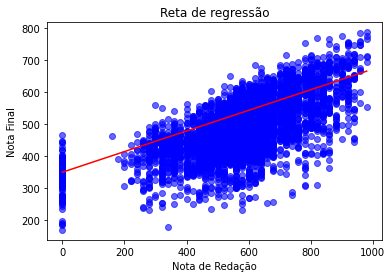

In [23]:
plt.scatter(y=df_suzano.nota_final, x=df_suzano.NOTA_REDACAO, color='blue', alpha=0.6)
X_plot = np.linspace(min(df_suzano.NOTA_REDACAO), max(df_suzano.NOTA_REDACAO), len(df_suzano.NOTA_REDACAO))
# X_plot = np.linspace(0, 1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()